In [1]:
# PUI2018 - Homework 4 - Gabriel Yin - ty1045 
author = '__Gabriel__'
contact = '__gabrielyin@berkeley.edu__'
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


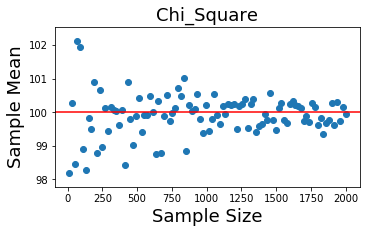

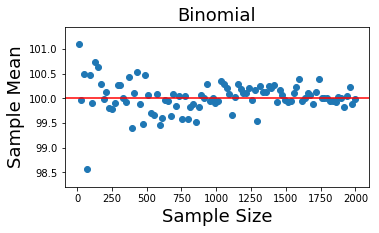

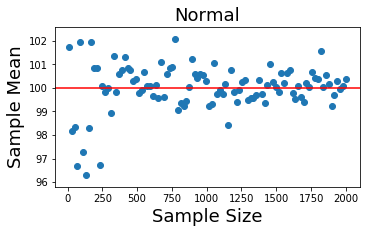

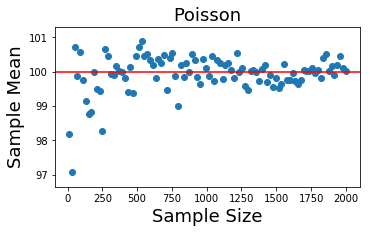

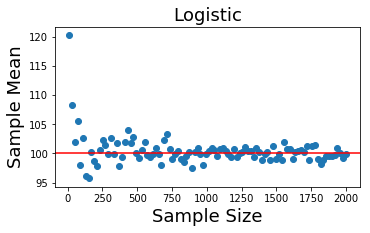

In [2]:
# Initialize mean
np.random.seed(666)
# Sample Size 
SIZE = np.linspace(11,1999,100).astype(int)
DF, NS, P, MEAN, N = 100, 200, 0.5, 100, 20
# distributions
distributions = ['Chi_Square', 'Binomial', 'Normal', 'Poisson', 'Logistic']
distribution_data = {}
for dis in distributions:
    distribution_data[dis] = {}
    distribution_data[dis]['sample_mean'] = []

# generate data 
for size in SIZE:
    distribution_data['Chi_Square'][size] = np.random.chisquare(DF, size = size)
    distribution_data['Binomial'][size] = np.random.binomial(NS, P, size = size)
    distribution_data['Normal'][size] = np.random.normal(MEAN, N, size = size)
    distribution_data['Poisson'][size] = np.random.poisson(MEAN, size = size)
    distribution_data['Logistic'][size] = np.random.logistic(MEAN, N, size = size)
# generate sample mean 
for dis in distributions:
    for size in SIZE:
        distribution_data[dis]['sample_mean'].append(np.mean(distribution_data[dis][size]))
# subplots initialization
chisq = plt.figure(figsize=(12,10)).add_subplot(321)
binomial = plt.figure(figsize=(12,10)).add_subplot(322)
normal = plt.figure(figsize=(12,10)).add_subplot(323)
poisson = plt.figure(figsize=(12,10)).add_subplot(324)
logistic = plt.figure(figsize=(12,10)).add_subplot(325)

graphs = [chisq, binomial, normal, poisson, logistic]
# function to display plots
def plot(graph, name, size=SIZE):
    graph.set_xlabel('Sample Size', fontsize=18)
    graph.set_ylabel('Sample Mean', fontsize=18)
    graph.set_title(name, fontsize=18)
    graph.axhline(y=100, color='r', linestyle='-')
    graph.scatter(SIZE, distribution_data[name]['sample_mean'])
# plot all subplots
for graph, name in zip(graphs, distributions):
    plot(graph, name)

# Figure 1:  Sample mean (dependent var.) against the sample size N (independent var.) We can see that as sample number becomes larger, the sample mean becomes closer to our population mean.

/nfshome/ty1045/.conda/envs/best/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


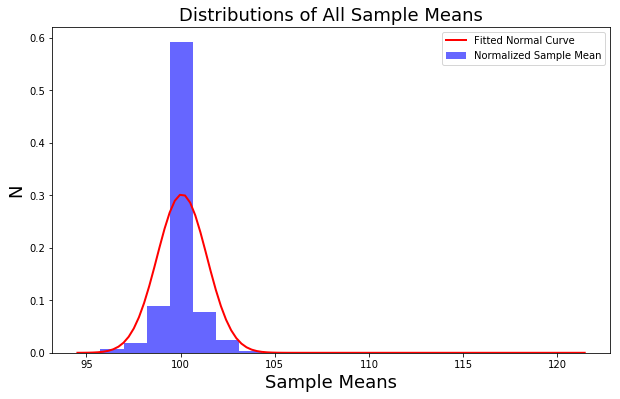

In [13]:
from scipy.stats import norm as nor
import pylab as pl

all_sample_means = list(distribution_data[dis]['sample_mean'] for dis in distributions)
flattened_all_sample_means = list(mean for sublist in all_sample_means for mean in sublist)
plt.figure(figsize=(10,6))
plt.hist(flattened_all_sample_means, bins=20, normed = True, alpha=0.6, color='b', label = 'Normalized Sample Mean')
# fit normal line 
ms, std = nor.fit(flattened_all_sample_means)
xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, 100)
p = nor.pdf(x, ms, std)
plt.plot(x, p, 'k', linewidth=2, label = 'Fitted Normal Curve', color='r')
plt.xlabel('Sample Means', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Distributions of All Sample Means', fontsize = 18)
plt.legend()

# Figure 2: A Distribution of All Sample Means
## The resulting graph is shown above. We can see that the result is virtually normally distributed. The reason is that we have taken a really large amount of size. This has proved the Central Limit Theorem, in which it says 1) the distribution of the means of N samples generated from the same parent distribution will be normally distributed and 2) have mean equal to the mean of the parent distribution.